In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np

# save('myData.mat','vhist','zhist','vphist','zphist','hist_pos','T', "ktime", "time_hist")
mat = spio.loadmat('9vehicles/myData.mat', squeeze_me=True)

In [2]:

print(type(mat))
vhist = mat['vhist']  # structures need [()]
vphist = mat['vphist']
hist_pos = mat['hist_pos']
zhist = mat['zhist']
zphist = mat['zphist']
ktime = mat['ktime']
time_hist = mat['time_hist']
T_total = mat['End']
#  ----------------------------------------------------------------------------
horizon = hist_pos.shape[1]
robots = hist_pos.shape[0]
index_array =['robot ' + str(i+1) for i in range(robots)]


<class 'dict'>


In [3]:

df_vel = pd.DataFrame(vhist[:,:-1], columns = np.arange(1,horizon))
df_zel= pd.DataFrame(zhist[:,:-1], columns = np.arange(1,horizon))
df_pos = pd.DataFrame(hist_pos[:,:-1], columns = np.arange(1,horizon))
df_time = pd.DataFrame(time_hist, columns = np.arange(1,horizon))
df_vel['agent'] = index_array
df_zel['agent'] = index_array
df_pos['agent'] = index_array
df_time['agent'] = index_array
# df.index.names = ['agents']
# df_vel.index.names = ['agents']
# df_vel.reset_index(drop=True)
# index = pd.Index(index_array, name = 'agent') #pd.Index(np.arange(1,robots+1))
# df = df.set_index(index)
print('df_time', df_time)
print(df_vel)


df_time            1         2         3         4         5         6         7  \
0   0.095975  0.095599  0.073778  0.040104  0.024370  0.018204  0.015281   
1   0.035756  0.016655  0.018374  0.067175  0.031493  0.036247  0.040738   
2   0.023288  0.024462  0.047424  0.044585  0.018118  0.018820  0.018826   
3   0.047691  0.038893  0.038294  0.027956  0.026339  0.025751  0.028731   
4   0.021433  0.021779  0.022029  0.024959  0.028136  0.027879  0.026389   
5   0.058395  0.031549  0.023542  0.020476  0.022470  0.030796  0.027441   
6   0.032003  0.033809  0.044917  0.062595  0.062115  0.078396  0.068416   
7   0.030949  0.026455  0.027133  0.042348  0.043542  0.035861  0.033324   
8   0.018652  0.014903  0.019774  0.019326  0.019053  0.017047  0.018647   
9   0.043371  0.038691  0.040857  0.035655  0.041586  0.042582  0.043239   
10  0.033218  0.050558  0.036246  0.027795  0.020351  0.020860  0.020403   
11  0.087542  0.071969  0.064044  0.051951  0.054852  0.045763  0.044915   

   

In [4]:
vel_melt = df_vel.melt(id_vars=['agent'], var_name='k', value_name='Vel')
zel_melt = df_zel.melt(id_vars=['agent'], var_name='k', value_name='Zel')
pos_melt = df_pos.melt(id_vars=['agent'], var_name='k', value_name='Pos')
time_melt = df_time.melt(id_vars=['agent'], var_name='k', value_name='d_time')
df_data = vel_melt.merge(zel_melt, on=['agent', 'k'], how='inner') \
                .merge(pos_melt, on=['agent', 'k'], how='inner')\
                .merge(time_melt, on=['agent', 'k'], how='inner')
df_data

,agent,k,Vel,Zel,Pos,d_time
0,robot 1,1,40.0,3,30.0,0.095975
1,robot 2,1,20.0,1,-40.0,0.035756
2,robot 3,1,10.0,3,-20.0,0.023288
3,robot 4,1,20.0,4,-10.0,0.047691
4,robot 5,1,10.0,2,-30.0,0.021433
...,...,...,...,...,...,...
475,robot 8,40,40.0,4,158.0,0.049056
476,robot 9,40,20.0,1,86.7,0.024647
477,robot 10,40,50.0,5,197.0,0.053224
478,robot 11,40,15.0,2,78.0,0.023141


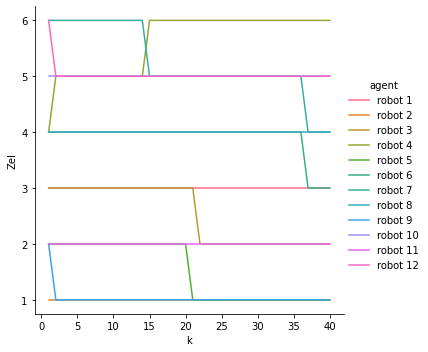

In [5]:
# tiempos = database[]
sns.relplot( x = 'k', y= 'Zel' ,data = df_data, kind='line' , hue = 'agent')
plt.show()

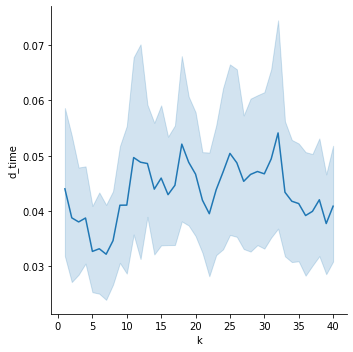

In [6]:
sns.relplot( x = 'k', y= 'd_time' ,data = df_data, kind='line' )
plt.show()

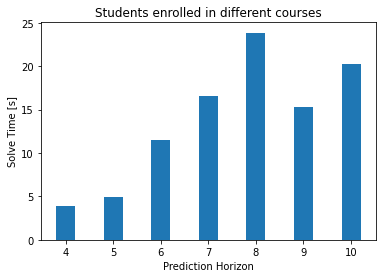

In [7]:
range_horizon = [4,5,6,7,8,9,10]
range_vehicles = [2,3,4,5,6,7,8,9,10,11,12]

# time of whole time vs horizon
sim_time = []
k_time = []
for i in range_horizon:
    mat = spio.loadmat(f'11vehicles/datasave/data_11v_{i}N.mat', squeeze_me=True)
    sim_time.append(mat['End'])
    k_time.append(mat['ktime'])

fig = plt.figure()

# creating the bar plot
plt.bar(range_horizon, sim_time, width = 0.4)
plt.xlabel("Prediction Horizon")
plt.ylabel("Solve Time [s]")
plt.title("Students enrolled in different courses")
plt.show()
# sim_time

<AxesSubplot:xlabel='horizon', ylabel='time'>

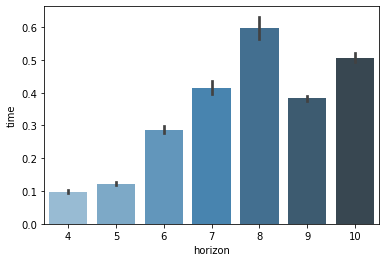

In [8]:
df_ktime = pd.DataFrame(k_time)
df_ktime['horizon'] = range_horizon
ktime_melt = df_ktime.melt(id_vars=['horizon'], var_name='k', value_name='time')
ktime_melt
sns.barplot(x="horizon", y="time", data=ktime_melt, palette='Blues_d')

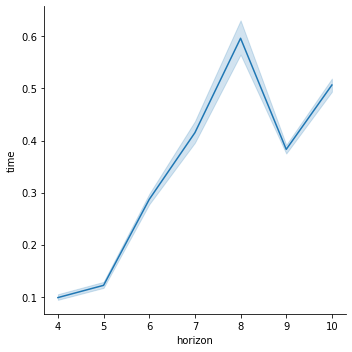

In [9]:
sns.relplot( x="horizon", y="time", data=ktime_melt, kind='line' )
plt.show()

In [10]:
# plot descentraliced and centralized times
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=1)

agent
robot 1     0.028472
robot 10    0.046580
robot 11    0.027628
robot 12    0.064599
robot 2     0.036665
robot 3     0.026505
robot 4     0.048517
robot 5     0.029154
robot 6     0.054085
robot 7     0.080613
robot 8     0.053371
robot 9     0.024045
dtype: float64

In [11]:
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=0)

k
1     0.044023
2     0.038777
3     0.038034
4     0.038744
5     0.032702
6     0.033184
7     0.032196
8     0.034652
9     0.041059
10    0.041074
11    0.049680
12    0.048835
13    0.048598
14    0.043966
15    0.045963
16    0.042962
17    0.044662
18    0.052107
19    0.048828
20    0.046677
21    0.041966
22    0.039518
23    0.043862
24    0.047067
25    0.050435
26    0.048733
27    0.045377
28    0.046627
29    0.047158
30    0.046734
31    0.049432
32    0.054133
33    0.043406
34    0.041777
35    0.041355
36    0.039191
37    0.039950
38    0.042045
39    0.037742
40    0.040882
dtype: float64

In [12]:
range_horizon = [4, 5, 6, 7, 8, 9, 10]
range_vehicles = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

time = []
k_time = []
for i in range_horizon:

    sim_time = []
    simk_time = []
    for j in range_vehicles:
        mat = spio.loadmat(f'{j}vehicles/datasave/data_{j}v_{i}N.mat', squeeze_me=True)
        sim_time.append(mat['End'])
        mean_time = np.mean(mat['ktime'])
        simk_time.append(mean_time)
    time.append(sim_time)
    k_time.append((simk_time))
time

[[0.499484,
  1.066099,
  1.520703,
  2.076611,
  2.348711,
  2.807553,
  3.325487,
  3.755026,
  4.132342,
  3.935449,
  4.968405],
 [0.523264,
  1.211635,
  1.877931,
  2.514708,
  3.091118,
  3.566935,
  4.228585,
  4.508217,
  5.322496,
  4.875899,
  6.449244],
 [0.584923,
  1.43564,
  2.454565,
  3.164544,
  3.749557,
  4.561136,
  5.520362,
  5.944879,
  6.670106,
  11.480301,
  8.047704],
 [0.628166,
  1.854243,
  3.120473,
  4.134772,
  4.704039,
  5.861914,
  7.107886,
  7.685021,
  8.632519,
  16.603339,
  19.445428],
 [0.728637,
  2.367296,
  3.923844,
  5.151175,
  6.277858,
  7.618265,
  9.212583,
  9.878446,
  11.073875,
  23.860212,
  12.139361],
 [0.881149,
  2.867698,
  5.150885,
  6.697764,
  8.304378,
  10.217375,
  12.129127,
  13.414441,
  14.811253,
  15.324069,
  15.566573],
 [0.92306,
  3.453414,
  6.634586,
  8.882729,
  11.060468,
  13.640735,
  16.055845,
  17.699172,
  19.725861,
  20.26902,
  20.665795]]

In [13]:
df_time = pd.DataFrame(time, columns=range_vehicles)
df_time['Horizon'] = range_horizon
time_melt = df_time.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# time_melt
df_ktime_mean = pd.DataFrame(k_time)
df_ktime_mean['Horizon'] = range_horizon
ktime_melt = df_ktime_mean.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# ktime_melt

In [14]:
time_melt

,Horizon,NumberVehicles,time
0,4,2,0.499484
1,5,2,0.523264
2,6,2,0.584923
3,7,2,0.628166
4,8,2,0.728637
...,...,...,...
72,6,12,8.047704
73,7,12,19.445428
74,8,12,12.139361
75,9,12,15.566573


In [15]:
times_simulation = time_melt.merge(ktime_melt, on=['Horizon', 'NumberVehicles'], how='inner', suffixes=('_Centralized', '_Descentralized'))
times_simulation

,Horizon,NumberVehicles,time_Centralized,time_Descentralized
0,4,2,0.499484,0.037999
1,5,2,0.523264,0.046939
2,6,2,0.584923,0.061359
3,7,2,0.628166,0.078007
4,8,2,0.728637,0.098071
...,...,...,...,...
58,6,10,6.670106,0.201188
59,7,10,8.632519,0.486116
60,8,10,11.073875,0.303478
61,9,10,14.811253,0.389144


In [16]:
times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')

,Horizon,NumberVehicles,Method,time
0,4,2,time_Centralized,0.499484
1,5,2,time_Centralized,0.523264
2,6,2,time_Centralized,0.584923
3,7,2,time_Centralized,0.628166
4,8,2,time_Centralized,0.728637
...,...,...,...,...
121,6,10,time_Descentralized,0.201188
122,7,10,time_Descentralized,0.486116
123,8,10,time_Descentralized,0.303478
124,9,10,time_Descentralized,0.389144


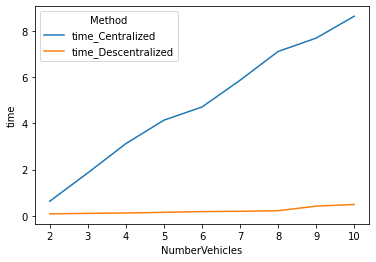

In [17]:
plot_data = times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')
sns.lineplot(x='NumberVehicles', y='time', data = plot_data[plot_data['Horizon']==7], hue='Method')
plt.show()

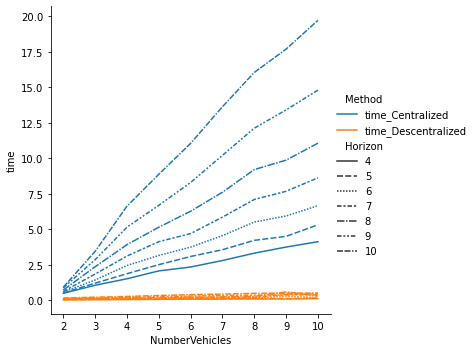

In [18]:
sns.relplot( x = 'NumberVehicles', y= 'time' ,data = plot_data, kind='line' , hue = 'Method', style="Horizon")
plt.show()

NameError: name 'cax' is not defined

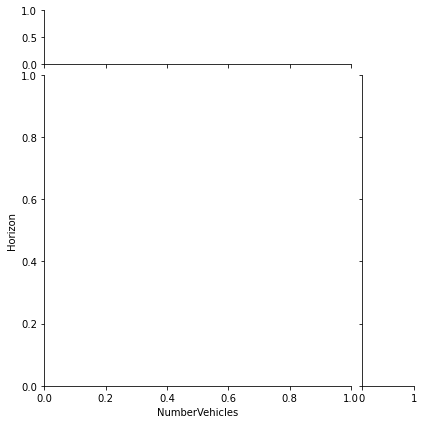

In [19]:
# Load the planets dataset and initialize the figure

g = sns.JointGrid(data=times_simulation, x="NumberVehicles", y="Horizon", marginal_ticks=True)


# Add the joint and marginal histogram plots
g.plot_joint(sns.histplot, discrete=(True, False),
    cmap="rocket", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [ ]:
# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [ ]:
planets